In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [2]:
df = pd.read_csv("result_rt-thread.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,bernard.xiong@gmail.com,wuyangyong@gmail.com,ssslady@gmail.com,Kyle.Hu.GZ@gmail.com,qiuyiuestc@gmail.com,lijin.unix@gmail.com,gouqingsong@gmail.com,aganhx@gmail.com,coldfish.zhu,...,31397594+chengy2@users.noreply.github.com,55530868+youzuwei@users.noreply.github.com,qiu-pengwei@outlook.com,1309908437@qq.com,2669707827@qq.com,unicorn_wang@outlook.com,Jiading.Xu@hpmicro.com,1203593632@qq.com,945386260@qq.com,945386260@qq.com.1
0,src/ipc.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,src/mem.c,33.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,src/object.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,src/scheduler.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,src/thread.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,components/drivers/ktime/src/hrtimer.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,components/drivers/ofw/ofw.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,components/dfs/dfs_v2/src/dfs_pcache.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023,components/dfs/dfs_v2/src/dfs_file_mmap.c,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['bernard.xiong@gmail.com', 'wuyangyong@gmail.com', 'ssslady@gmail.com', 'Kyle.Hu.GZ@gmail.com', 'qiuyiuestc@gmail.com', 'lijin.unix@gmail.com', 'gouqingsong@gmail.com', 'aganhx@gmail.com', 'coldfish.zhu', 'mbbill@gmail.com', 'fengzi.rtt@gmail.com', 'kyle.hu.gz@gmail.com', 'gary.li.wenchao.4@gmail.com', 'dzzxzz@gmail.com', 'bernard.xiong@gmail.com.1', 'richard.lion.heart.gl@gmail.com', 'jiaojinxing1987@gmail.com', 'wangjiyang@gmail.com', 'iamyhw@gmail.com', 'dennis.zhang.os@gmail.com', 'onelife.real@gmail.com', 'onelife.real@gmail.com.1', 'itspy.wei@gmail.com', 'boksic@126.com', 'luohui2320@gmail.com', 'qiuyiuestc@gmail.com.1', 'mbbill@gmail.com.1', 'Kyle.Hu.GZ@gmail.com.1', 'yungchi@cs.nctu.edu.tw', 'chaos.proton@gmail.com', 'fengzi.rtt@gmail.com.1', 'nongli1031@gmail.com', 'dzzxzz@gmail.com.1', 'goprife@gmail.com', 'sc943313837@gmail.com', 'xiongyihui3@gmail.com', 'rogerz.zhang@gmail.com', 'goprife@gmail.com.1', 'bernard.xiong@gmail.com.2', 'mbbill@gmail.com.2', 'sc943313837@gmail.co

In [13]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 212


In [12]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 787


In [5]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_rt-thread.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_rt-thread.csv


In [6]:
data = pd.read_csv("contagem_arquivos_por_responsavel_rt-thread.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,bernard.xiong@gmail.com,31
1,wuyangyong@gmail.com,12
2,ssslady@gmail.com,0
3,Kyle.Hu.GZ@gmail.com,0
4,qiuyiuestc@gmail.com,8
...,...,...
782,unicorn_wang@outlook.com,0
783,Jiading.Xu@hpmicro.com,0
784,1203593632@qq.com,0
785,945386260@qq.com,0


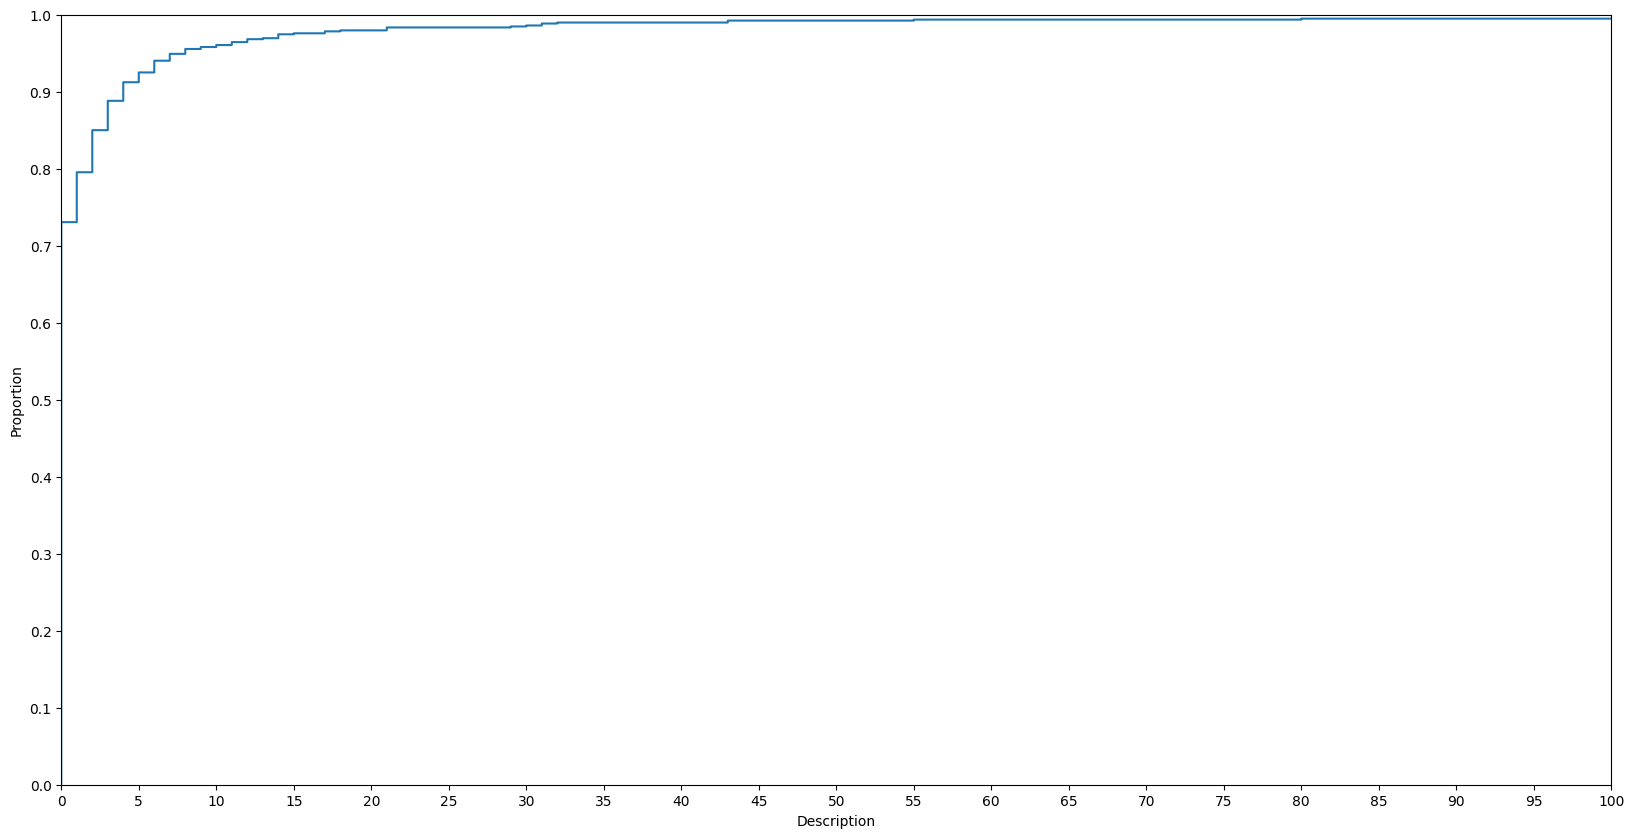

In [7]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

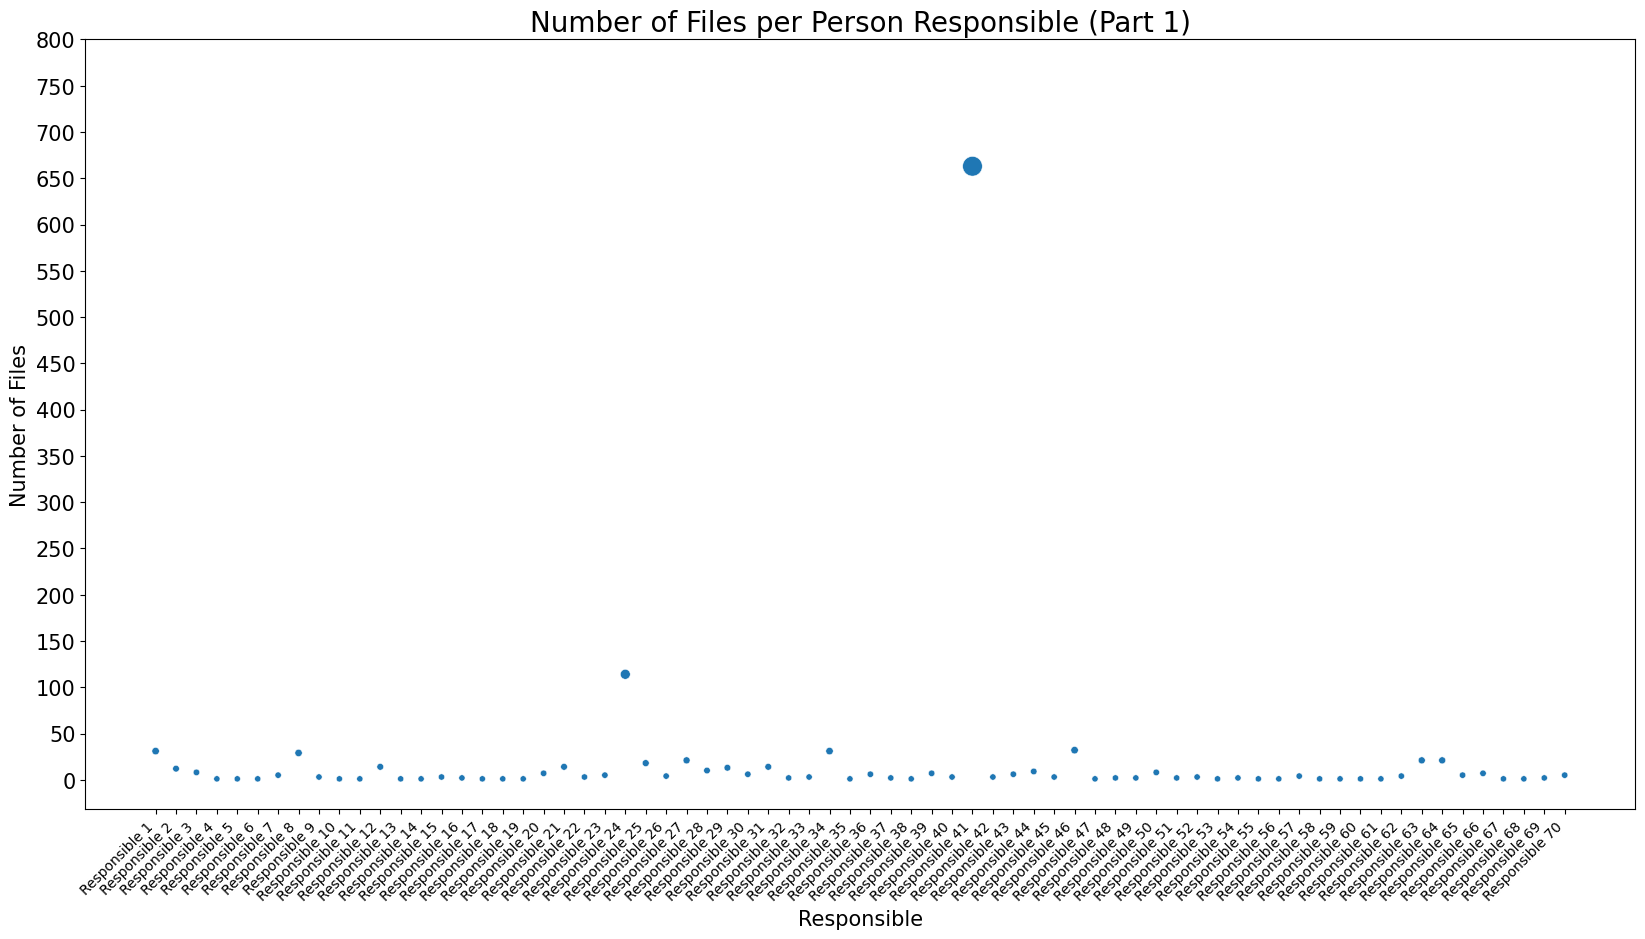

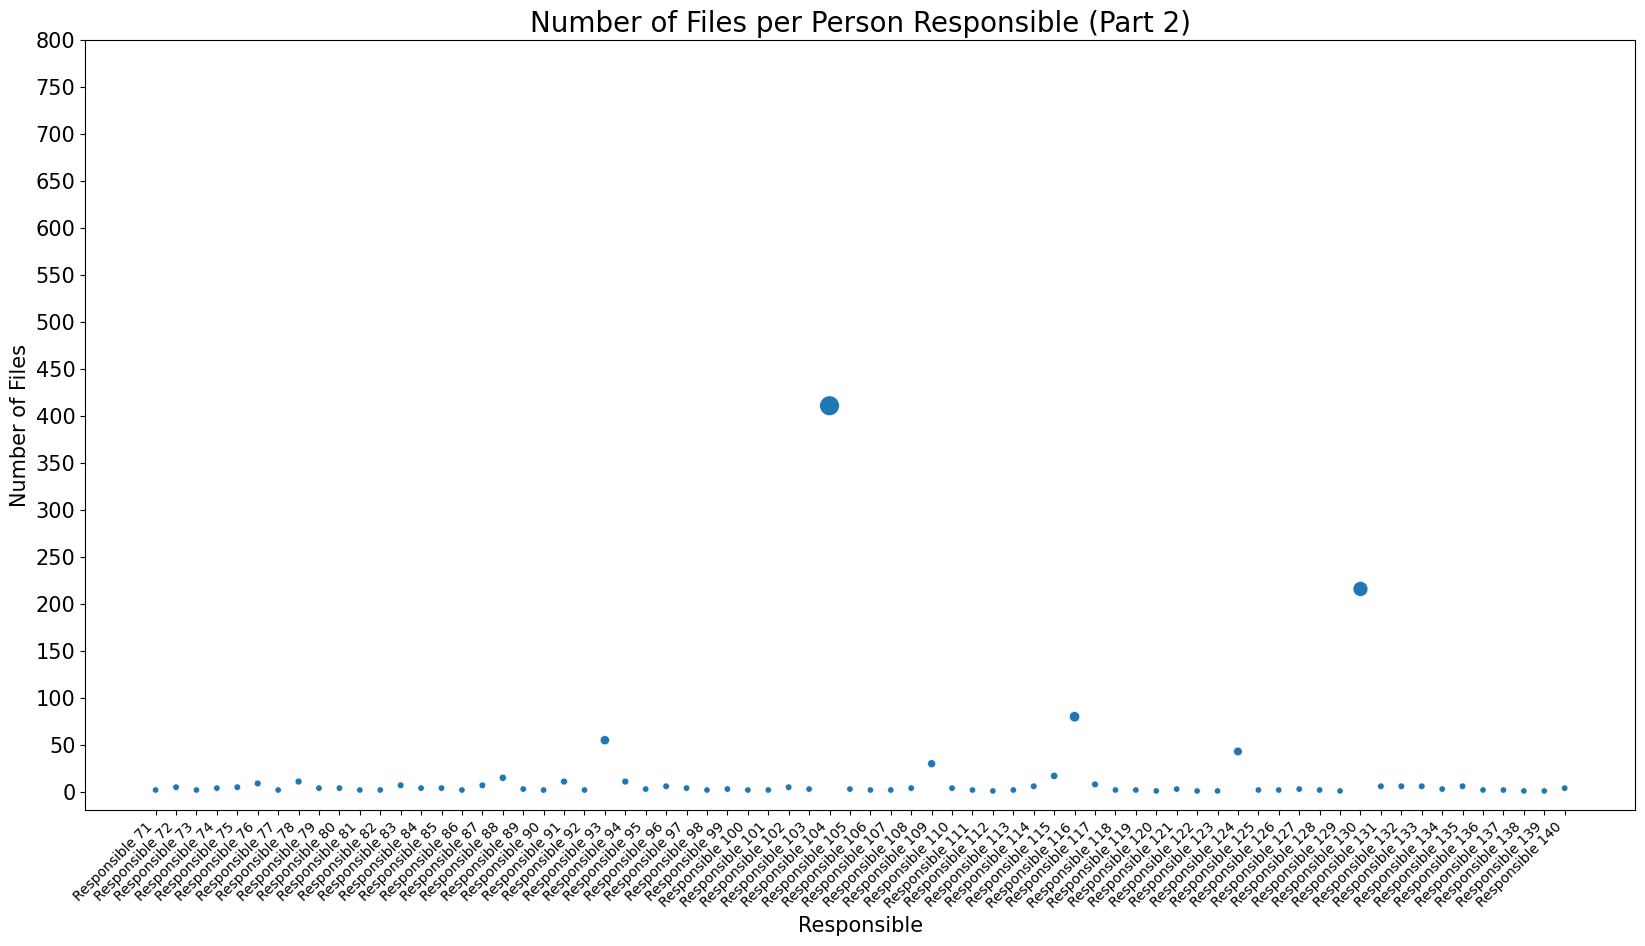

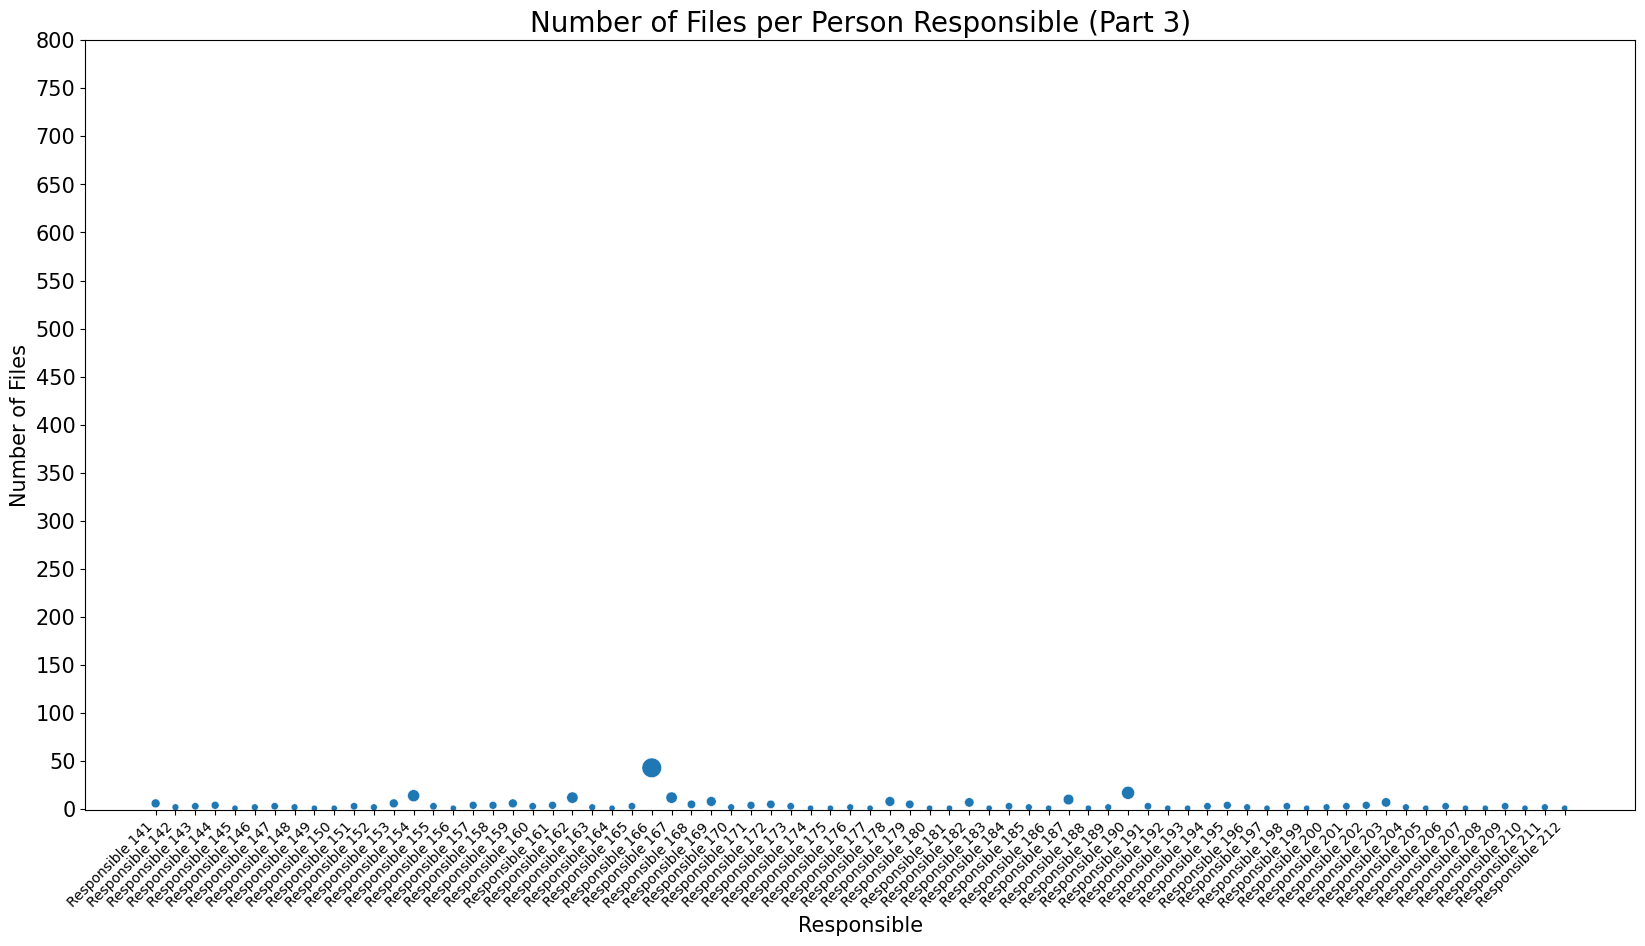

In [8]:

# Filtrar os dados para mostrar apenas aqueles com mais de 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Dividir os dados em três subconjuntos
part_size = len(filtered_data) // 3
data_part1 = filtered_data.iloc[:part_size]
data_part2 = filtered_data.iloc[part_size:2*part_size]
data_part3 = filtered_data.iloc[2*part_size:]

# Gráfico 1
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part1, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 1)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o primeiro gráfico
plt.show()

# Gráfico 2
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part2, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 2)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o segundo gráfico
plt.show()

# Gráfico 3
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part3, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 3)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o terceiro gráfico
plt.show()

In [9]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_rt-thread.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_rt-thread.csv


In [10]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_rt-thread.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,src/mem.c,3
1,bsp/mini2440,3
2,bsp/lpc2148,2
3,bsp/lpc2478,1
4,bsp/lpc176x,2
...,...,...
1316,bsp/hpmicro/libraries/hpm_sdk/soc/HPM6750/tool...,1
1317,bsp/hpmicro/libraries/drivers/drv_spi.c,1
1318,bsp/hpmicro/libraries/drivers/drv_adc.c,1
1319,bsp/hpmicro/libraries/drivers/drv_pdm.c,1


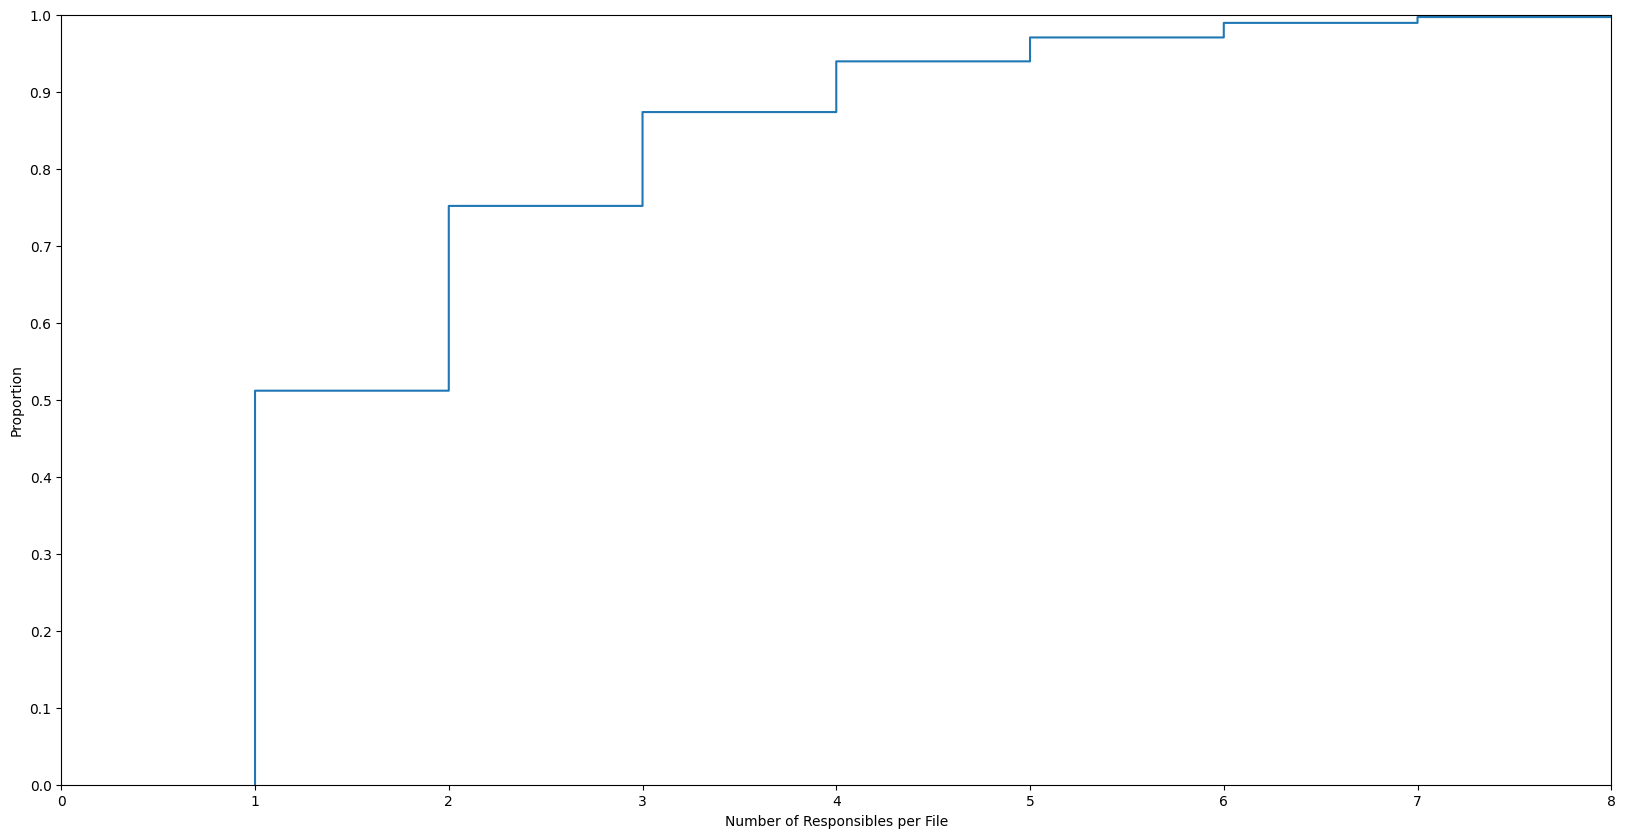

In [11]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()